# Chapter 31 - Working with Time Series

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


## 31.1 Loading the Data

In [2]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/dirtydevil.txt'

In [3]:
df = pd.read_csv(url, skiprows=lambda num: num < 34 or num == 35, sep='\t') # ASCII code for `#` sign is 35.

/var/folders/gg/0m4l7pvs5zq9d8p4tzflypdc0000gn/T/ipykernel_77806/1888113246.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=lambda num: num < 34 or num == 35, sep='\t') # ASCII code for `#` sign is 35.


In [4]:
df

,agency_cd,site_no,datetime,tz_cd,144166_00060,144166_00060_cd,144167_00065,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00,MDT,71.00,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15,MDT,71.00,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30,MDT,71.00,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45,MDT,70.00,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...,...
539300,USGS,9333500,2020-09-28 08:30,MDT,9.53,P,6.16,P
539301,USGS,9333500,2020-09-28 08:45,MDT,9.20,P,6.15,P
539302,USGS,9333500,2020-09-28 09:00,MDT,9.20,P,6.15,P
539303,USGS,9333500,2020-09-28 09:15,MDT,9.20,P,6.15,P


In [5]:
def tweak_river(df_):
    return (df_
            .assign(datetime=pd.to_datetime(df_.datetime))
            .rename(columns={'144166_00060': 'cfs',
                             '144167_00065': 'gage_height'})
            .set_index('datetime')
            )

In [6]:
dd = tweak_river(df)
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00,USGS,9333500,MDT,9.20,P,6.15,P


## 31.2 Adding Timezone information

In [7]:
dd.tz_cd.unique()

array(['MDT', 'MST'], dtype=object)

In [8]:
def to_america_denver_time(df_, time_col, tz_col):
    return (df_
            .assign(**{tz_col: df_[tz_col].replace('MDT', 'MST7MDT')})
            .groupby(tz_col)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                       .dt.tz_localize(s.name, ambiguous=True)
                       .dt.tz_convert('America/Denver'))
            )

In [9]:
def tweak_river(df_):
    return (df_
            .assign(datetime=to_america_denver_time(df_, 'datetime', 'tz_cd'))
            .rename(columns={'144166_00060': 'cfs',
                             '144167_00065': 'gage_height'})
            .set_index('datetime')
            )

In [10]:
dd = tweak_river(df)

In [11]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00-06:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P


## 31.3 Exploring the Data

<AxesSubplot: xlabel='datetime'>

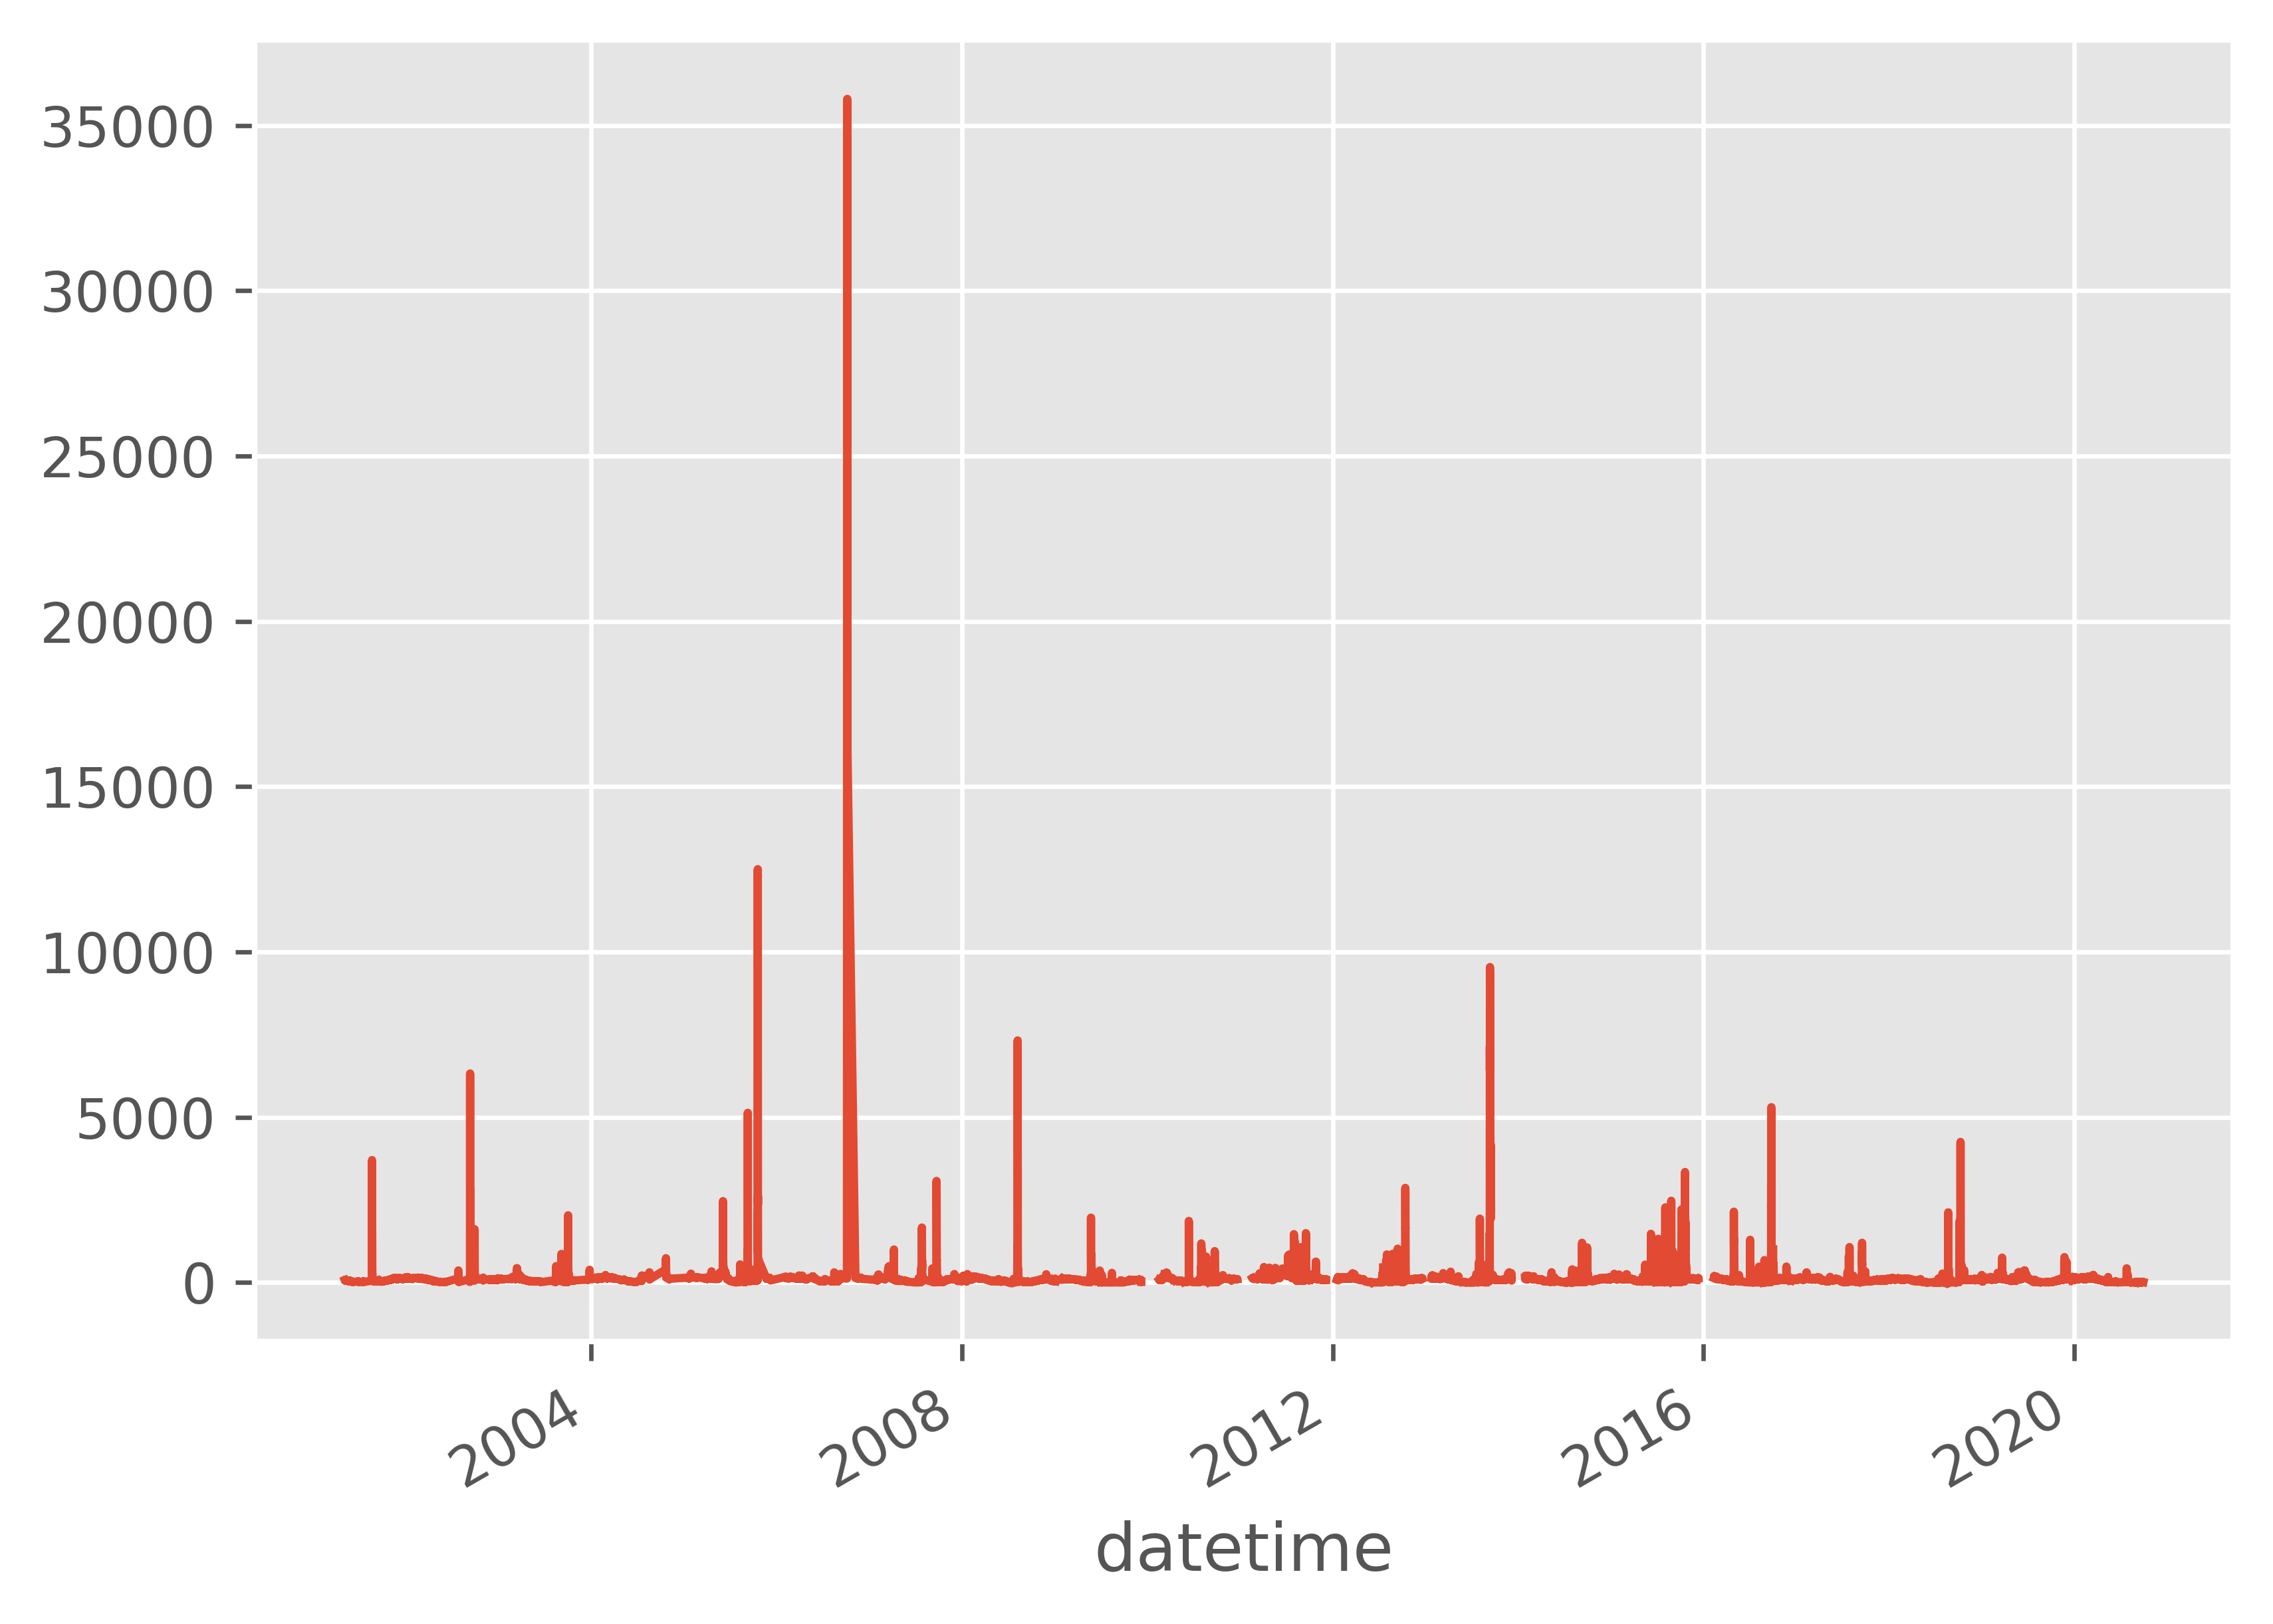

In [12]:
fig, ax = plt.subplots(dpi=600)
dd.cfs.plot()

In [13]:
dd.cfs.describe()

count    493124.000000
mean        104.460537
std         477.341329
min           0.000000
25%          34.700000
50%          81.000000
75%         115.000000
max       35800.000000
Name: cfs, dtype: float64

## 31.4 Slicing Time Series

In [14]:
(dd
 .cfs
 .loc['2018':])

datetime
2018-01-01 00:00:00-07:00    92.80
2018-01-01 00:15:00-07:00    88.30
2018-01-01 00:30:00-07:00    90.50
2018-01-01 00:45:00-07:00    90.50
2018-01-01 01:00:00-07:00    94.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 95886, dtype: float64

<AxesSubplot: xlabel='datetime'>

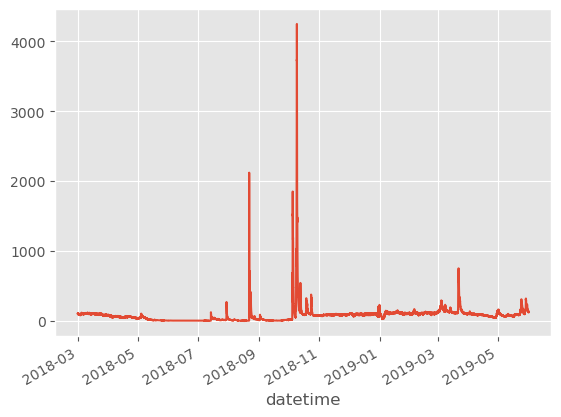

In [15]:
(dd
 .cfs
 .loc['2018/3':'2019/5']
 .plot()
 )

<AxesSubplot: xlabel='datetime'>

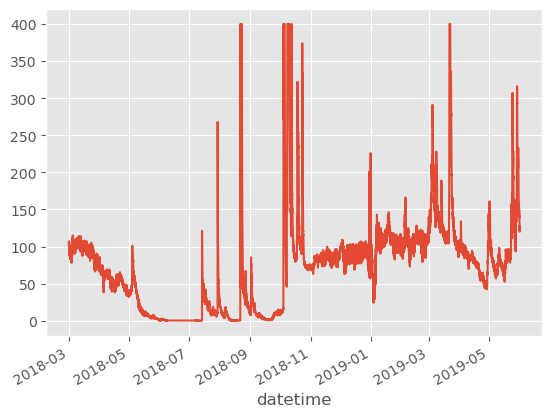

In [16]:
(dd
 .cfs
 .loc['2018/3':'2019/5']
 .clip(upper=400)
 .plot()
 )

In [17]:
dd2018 = (dd
          .cfs
          .loc['2018/3':'2019/5']
          .clip(upper=400))

Text(0.5, 1.0, 'Dirty Devil Flow 2018 (cfs)')

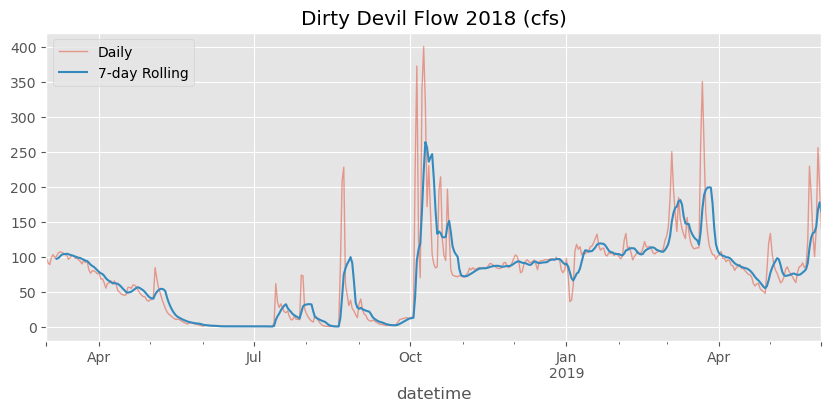

In [18]:
ax = (dd2018
      .resample('D')
      .mean()
      .plot(figsize=(10,4), alpha=0.5, linewidth=1, label='Daily')
      )

ax = (dd2018
      .resample('D')
      .mean()
      .rolling(7)
      .mean()
      .plot(figsize=(10,4), ax=ax, label='7-day Rolling')
      )

ax.legend()
ax.set_title('Dirty Devil Flow 2018 (cfs)')

## 31.5 Missing Timeseries Data

In [19]:
(dd
 [['cfs']]
 .loc['2018/3': '2019/5']
 .query('cfs.isna()')
 )

,cfs
datetime,
2018-07-07 13:15:00-06:00,NaN
2018-07-07 13:30:00-06:00,NaN
2018-07-07 13:45:00-06:00,NaN
2018-07-07 14:00:00-06:00,NaN
2018-07-07 14:15:00-06:00,NaN
...,...
2018-08-18 08:15:00-06:00,NaN
2018-08-18 08:30:00-06:00,NaN
2018-08-18 08:45:00-06:00,NaN


<AxesSubplot: xlabel='datetime'>

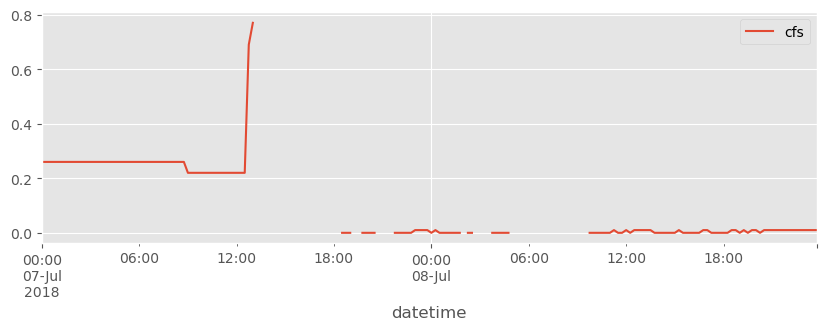

In [20]:
(dd
 [['cfs']]
 .loc['2018/7/7':'2018/7/8']
 .plot(figsize=(10,3))
 )

In [21]:
dd_july = (dd
           ['cfs']
           .loc['2018/7/7 11:00': '2018/7/7 20:00'])

Text(0.5, 1.0, 'Missing Values Demo')

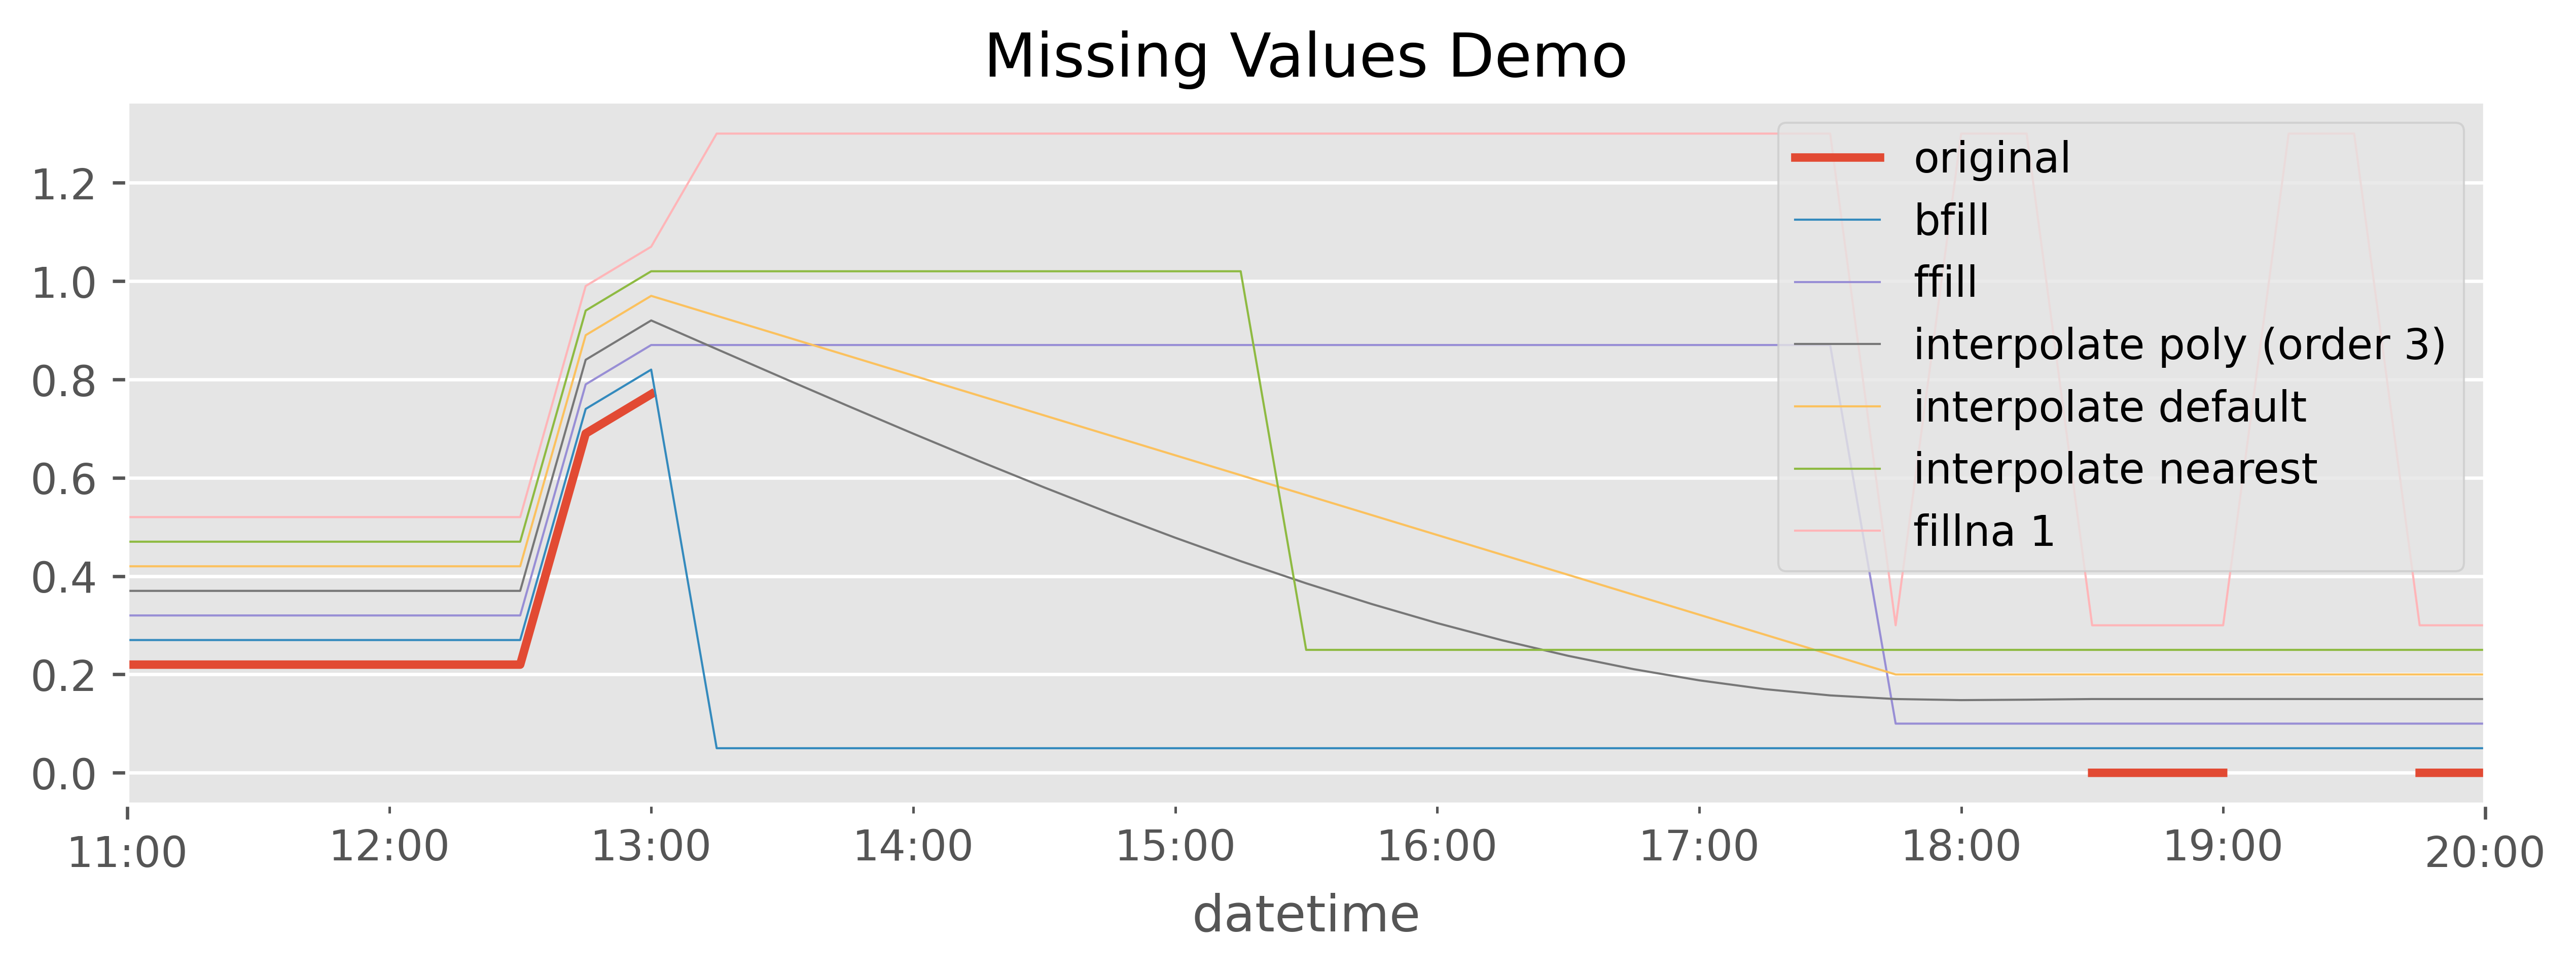

In [22]:
fig, ax = plt.subplots(dpi=600, figsize=(10,3))

dd_july.plot(ax=ax, label='original', linewidth=2)

(dd_july
 .bfill()
 .add(.05)
 .plot(label='bfill', ax=ax, linewidth=0.5))

(dd_july
 .ffill()
 .add(.1)
 .plot(label='ffill', ax=ax, linewidth=0.5))

(dd_july
 .interpolate(method='polynomial', order=3)
 .add(.15)
 .plot(label='interpolate poly (order 3)', ax=ax, linewidth=0.5))

(dd_july
 .interpolate()
 .add(.2)
 .plot(label='interpolate default', ax=ax, linewidth=0.5))

(dd_july
 .interpolate(method='nearest')
 .add(.25)
 .plot(label='interpolate nearest', ax=ax, linewidth=0.5))

(dd_july
 .fillna(1)
 .add(.3)
 .plot(label='fillna 1', ax=ax, linewidth=0.5))

ax.legend()
ax.set_title('Missing Values Demo')


## 31.6 Exploring Seasonality

In [23]:
# page 292